In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel("/E Commerce Dataset.xlsx")

In [ ]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
df.isna().sum()*100/len(df)

,0
CustomerID,0.000000
Churn,0.000000
Tenure,4.689165
PreferredLoginDevice,0.000000
CityTier,0.000000
WarehouseToHome,4.458259
PreferredPaymentMode,0.000000
Gender,0.000000
HourSpendOnApp,4.529307
NumberOfDeviceRegistered,0.000000


In [ ]:
 numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
 for column in list(numerical_columns):
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
df.isna().sum()*100/len(df)   wait

,0
CustomerID,0.0
Churn,0.0
Tenure,0.0
PreferredLoginDevice,0.0
CityTier,0.0
WarehouseToHome,0.0
PreferredPaymentMode,0.0
Gender,0.0
HourSpendOnApp,0.0
NumberOfDeviceRegistered,0.0


In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print("")

CustomerID
[50001 50002 50003 ... 55628 55629 55630]

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13

In [ ]:
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,2765
Computer,1634
Phone,1231


In [ ]:
category_mapping = {'Phone': 'Mobile Phone'}
df['PreferredLoginDevice'] = df[ 'PreferredLoginDevice'].replace(category_mapping)
print(df['PreferredLoginDevice'].value_counts())

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64


In [ ]:
df.replace({ "PreferredLoginDevice": {'Mobile Phone': 0, 'Computer': 1}}, inplace=True)

In [ ]:
df['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1501
E wallet,614
UPI,414
COD,365
CC,273
Cash on Delivery,149


In [ ]:
category_mapping = {'CC': 'Credit Card'}
df['PreferredPaymentMode'] = df[ 'PreferredPaymentMode'].replace(category_mapping)
print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
UPI                  414
COD                  365
Cash on Delivery     149
Name: count, dtype: int64


In [ ]:
category_mapping = {'Cash on Delivery': 'COD'}
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(category_mapping)
print(df['PreferredPaymentMode'].value_counts())

PreferredPaymentMode
Debit Card     2314
Credit Card    1774
E wallet        614
COD             514
UPI             414
Name: count, dtype: int64


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,3384
Female,2246


In [ ]:
df.replace({ "Gender": {'Male': 8, 'Female': 1}}, inplace=True)

In [ ]:
df['PreferedOrderCat'].value_counts()

,count
PreferedOrderCat,
Laptop & Accessory,2050
Mobile Phone,1271
Fashion,826
Mobile,809
Grocery,410
Others,264


In [ ]:
category_mapping = {'Mobile': 'Mobile Phone'}
df[ 'PreferedOrderCat'] = df['PreferedOrderCat'].replace(category_mapping)
print(df['PreferedOrderCat'].value_counts())

PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


In [ ]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2986
Single,1796
Divorced,848


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,4682
1,948


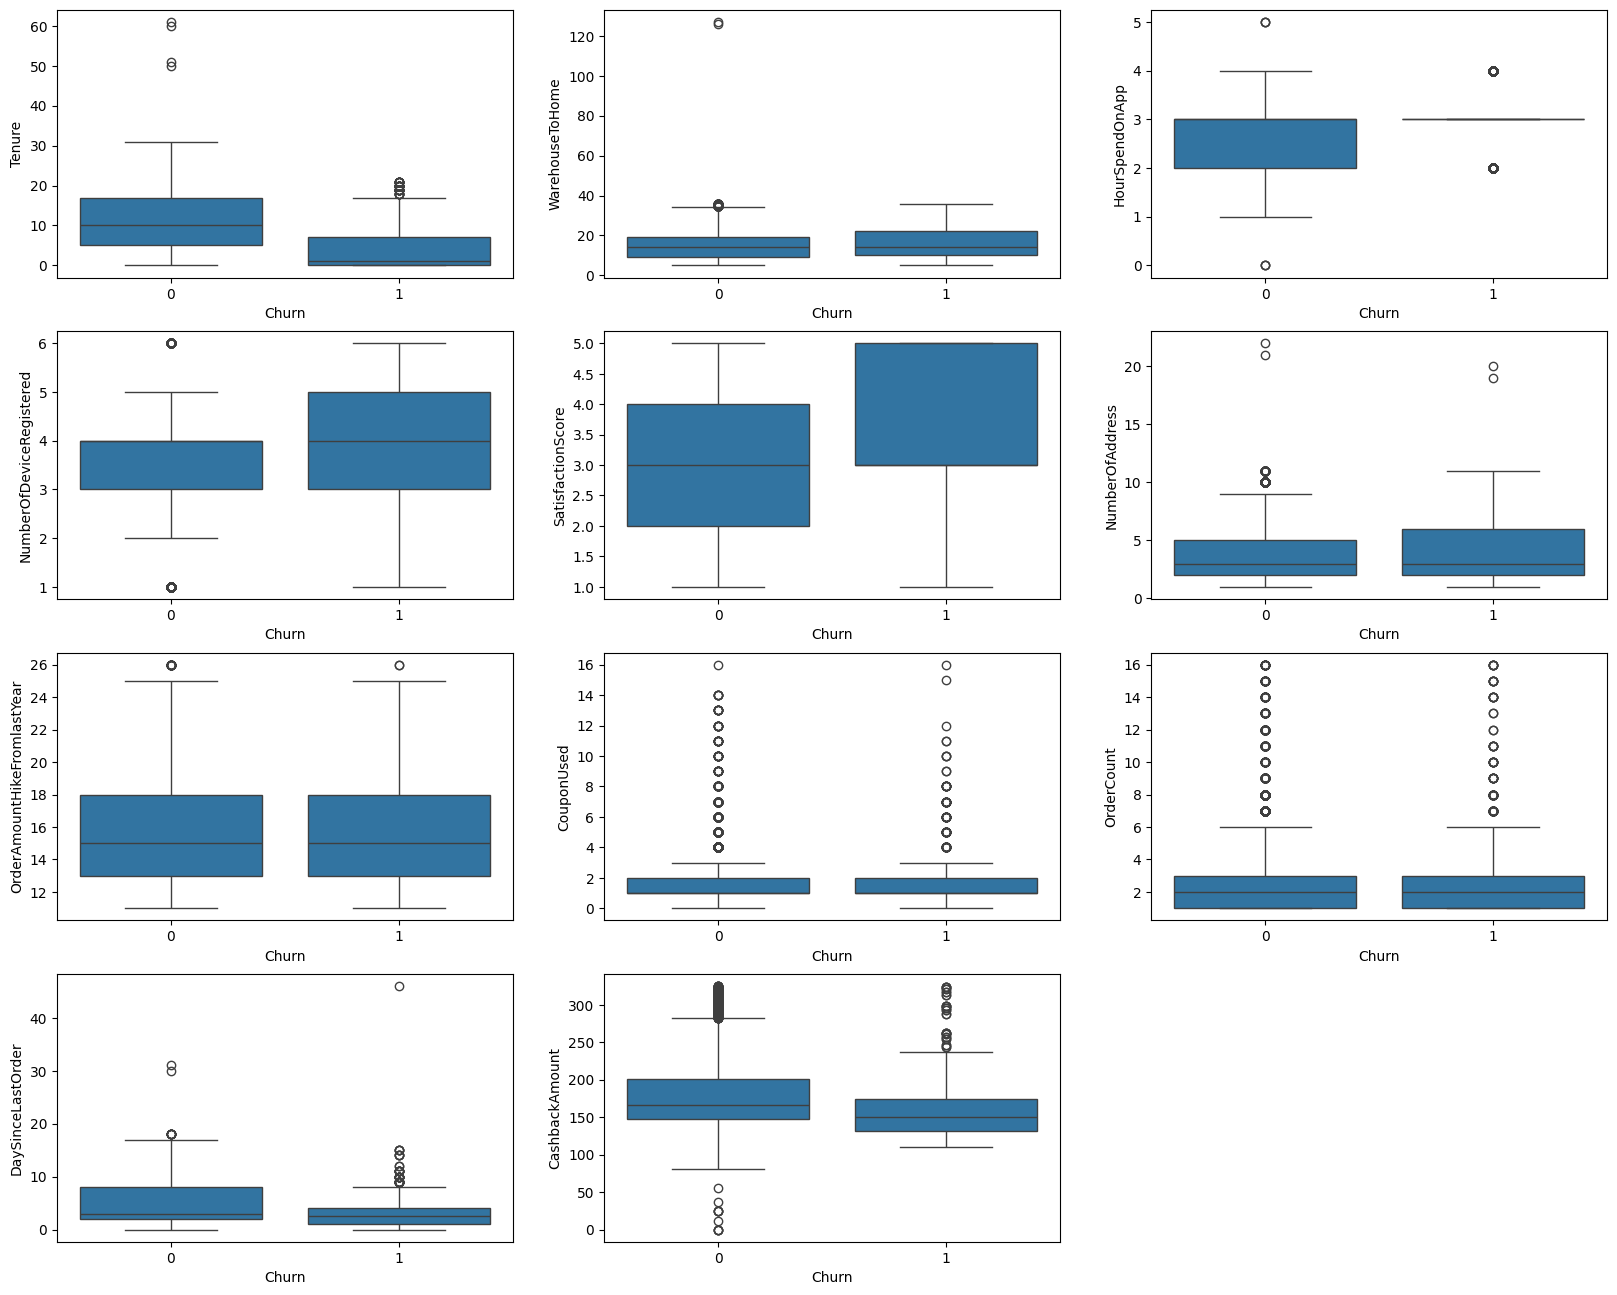

In [ ]:
#Visualizing numerical variables
plt.figure(figsize=(20, 16))
plt.subplot(4,3,1)
sns.boxplot(x = 'Churn', y = 'Tenure', data = df)
plt.subplot(4,3,2)
sns.boxplot(x = 'Churn', y = 'WarehouseToHome', data = df)
plt.subplot(4,3,3)
sns.boxplot(x= 'Churn', y =  'HourSpendOnApp', data = df)
plt.subplot(4,3,4)
sns.boxplot(x = 'Churn', y = 'NumberOfDeviceRegistered', data =  df)
plt.subplot(4,3,5)
sns.boxplot(x = 'Churn', y = 'SatisfactionScore', data = df)
plt.subplot(4,3,6)
sns.boxplot(x = 'Churn', y = 'NumberOfAddress', data = df)
plt.subplot(4,3,7)
sns.boxplot(x = 'Churn', y = 'OrderAmountHikeFromlastYear', data = df)
plt.subplot(4,3,8)
sns.boxplot(x = 'Churn', y = 'CouponUsed', data = df)
plt.subplot(4,3,9)
sns.boxplot(x = 'Churn', y =  'OrderCount', data = df)
plt.subplot(4,3,10)
sns.boxplot(x = 'Churn', y = 'DaySinceLastOrder', data = df)
plt.subplot(4,3,11)
sns.boxplot(x = 'Churn', y = 'CashbackAmount', data = df)
plt.show()

In [ ]:
categorical_features = ['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

In [ ]:
numerical_features = ['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [ ]:
df_features = df[numerical_features + categorical_features + ['Churn'] ]
df_features.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Churn
0,4.0,0,3,6.0,1,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93,Debit Card,Laptop & Accessory,Single,1
1,9.0,0,1,8.0,8,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90,UPI,Mobile Phone,Single,1
2,9.0,0,1,30.0,8,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28,Debit Card,Mobile Phone,Single,1
3,0.0,0,3,15.0,8,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07,Debit Card,Laptop & Accessory,Single,1
4,0.0,0,1,12.0,8,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60,Credit Card,Mobile Phone,Single,1
5,0.0,1,1,22.0,1,3.0,5,5,2,1,22.0,4.0,6.0,7.0,139.19,Debit Card,Mobile Phone,Single,1
6,9.0,0,3,11.0,8,2.0,3,2,4,0,14.0,0.0,1.0,0.0,120.86,COD,Laptop & Accessory,Divorced,1
7,9.0,0,1,6.0,8,3.0,3,2,3,1,16.0,2.0,2.0,0.0,122.93,Credit Card,Mobile Phone,Divorced,1
8,13.0,0,3,9.0,8,3.0,4,3,2,1,14.0,0.0,1.0,2.0,126.83,E wallet,Mobile Phone,Divorced,1
9,9.0,0,1,31.0,8,2.0,5,3,2,0,12.0,1.0,1.0,1.0,122.93,Debit Card,Mobile Phone,Single,1


In [ ]:
def train_test_split_and_features (df_features):
  y = df_features["Churn"]
  x = df_features.drop('Churn', axis=1)
  x= pd.get_dummies (x, dtype = int)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
  print(x.head(5))
  print(x.columns)
  features=  list(x.columns)
  return x_train, x_test, y_train, y_test, features

In [ ]:
x_train, x_test, y_train, y_test, features = train_test_split_and_features(df_features)

   Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  Gender  \
0     4.0                     0         3              6.0       1   
1     9.0                     0         1              8.0       8   
2     9.0                     0         1             30.0       8   
3     0.0                     0         3             15.0       8   
4     0.0                     0         1             12.0       8   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0             3.0                         3                  2   
1             3.0                         4                  3   
2             2.0                         4                  3   
3             2.0                         4                  5   
4             3.0                         3                  5   

   NumberOfAddress  Complain  ...  PreferredPaymentMode_E wallet  \
0                9         1  ...                              0   
1                7         1  ...             

In [ ]:
x_train.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
1294,15.0,0,1,24.0,8,2.0,3,5,7,1,...,0,0,0,0,1,0,0,0,1,0
3904,18.0,0,1,9.0,1,4.0,2,1,3,1,...,0,0,1,0,0,0,0,0,1,0
3523,1.0,0,1,13.0,8,3.0,5,3,3,0,...,0,0,0,0,0,1,0,1,0,0
2100,18.0,0,3,17.0,1,2.0,3,1,4,0,...,0,0,0,1,0,0,0,0,1,0
4481,5.0,0,3,14.0,8,4.0,4,1,6,0,...,1,0,0,0,1,0,0,0,1,0
203,6.0,1,3,16.0,8,2.0,4,2,4,0,...,1,0,0,0,1,0,0,0,0,1
578,11.0,1,3,16.0,1,2.0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
2743,6.0,1,1,13.0,8,2.0,3,3,2,0,...,0,0,0,0,1,0,0,0,1,0
3514,16.0,0,1,36.0,8,3.0,6,2,6,0,...,0,0,0,0,1,0,0,0,0,1
1085,9.0,0,1,27.0,8,3.0,1,4,2,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=5,min_samples_split=0.01, max_features=0.8,max_samples=0.8):
  random_forest= RandomForestClassifier (random_state=0,\
                                        max_depth=max_depth, \
                                        min_samples_split=min_samples_split, \
                                        max_features=max_features,
                                        max_samples=max_samples)
  model = random_forest.fit(x_train, y_train)
  random_forest_predict =random_forest.predict(x_test)
  random_forest_conf_matrix= confusion_matrix(y_test, random_forest_predict)
  random_forest_acc_score =accuracy_score(y_test, random_forest_predict)
  print("confussion matrix")
  print(random_forest_conf_matrix)
  print("\n")
  print("Accuracy of Random Forest:", random_forest_acc_score*100,'\n')
  print(classification_report(y_test, random_forest_predict))
  return model

In [ ]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[894  45]
 [ 81 106]]


Accuracy of Random Forest: 88.80994671403198 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       939
           1       0.70      0.57      0.63       187

    accuracy                           0.89      1126
   macro avg       0.81      0.76      0.78      1126
weighted avg       0.88      0.89      0.88      1126



In [ ]:
param_grid =[
{'max_depth': [3,5,7,10], 'min_samples_split': [0.01,0.03, 0.07, 0.1],
'max_features': [0.7,0.8,0.9,1.0],
'max_samples': [0.7,8.8,0.9,1.0]}]

In [ ]:
from sklearn.model_selection import GridSearchCV
model =RandomForestClassifier()
search= GridSearchCV(estimator= model, param_grid= param_grid, cv=5, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.881 total time=   0.4s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.882 total time=   0.7s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.893 total time=   0.6s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.868 total time=   0.6s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.881 total time=   0.6s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.877 total time=   0.9s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.881 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.890 total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 8.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [ ]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score', inplace = True, ascending = False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
220,1.268147,0.067307,0.017739,0.002826,10,0.8,1.0,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.904550,0.911210,0.924528,0.895671,0.916667,0.910525,0.009906,1
236,1.534657,0.281381,0.038614,0.042830,10,0.9,1.0,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.905660,0.914539,0.923418,0.886792,0.915556,0.909193,0.012535,2
204,1.150957,0.074590,0.018265,0.003230,10,0.7,1.0,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.901221,0.915649,0.922309,0.893452,0.913333,0.909193,0.010413,3
252,1.674450,0.201739,0.016590,0.002987,10,1.0,1.0,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.903441,0.908990,0.922309,0.887902,0.916667,0.907862,0.011878,4
248,1.618564,0.193462,0.018185,0.004132,10,1.0,0.9,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.904550,0.907880,0.921199,0.884573,0.916667,0.906974,0.012687,5
232,1.424492,0.261337,0.019844,0.006023,10,0.9,0.9,0.01,"{'max_depth': 10, 'max_features': 0.9, 'max_sa...",0.903441,0.911210,0.914539,0.895671,0.908889,0.906750,0.006616,6
216,1.420103,0.280431,0.019295,0.004577,10,0.8,0.9,0.01,"{'max_depth': 10, 'max_features': 0.8, 'max_sa...",0.901221,0.907880,0.922309,0.887902,0.908889,0.905640,0.011203,7
188,1.282188,0.071057,0.016634,0.003695,7,1.0,1.0,0.01,"{'max_depth': 7, 'max_features': 1.0, 'max_sam...",0.897891,0.908990,0.914539,0.886792,0.916667,0.904976,0.011181,8
200,1.232969,0.191016,0.018663,0.003948,10,0.7,0.9,0.01,"{'max_depth': 10, 'max_features': 0.7, 'max_sa...",0.903441,0.913430,0.912320,0.887902,0.904444,0.904307,0.009136,9
240,1.400086,0.244248,0.019906,0.006039,10,1.0,0.7,0.01,"{'max_depth': 10, 'max_features': 1.0, 'max_sa...",0.899001,0.904550,0.918979,0.884573,0.912222,0.903865,0.011786,10


In [ ]:
results_save = pd.DataFrame (search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [ ]:
search.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'max_samples': 1.0,
 'min_samples_split': 0.01}

In [ ]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth =10, min_samples_split=0.01,
                               max_features= 0.7, max_samples= 1.0)

confussion matrix
[[897  42]
 [ 71 116]]


Accuracy of Random Forest: 89.96447602131438 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       939
           1       0.73      0.62      0.67       187

    accuracy                           0.90      1126
   macro avg       0.83      0.79      0.81      1126
weighted avg       0.89      0.90      0.90      1126



In [ ]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance', 'feature']
importances.sort_values(by = 'importance', ascending = True, inplace=True)

<BarContainer object of 28 artists>

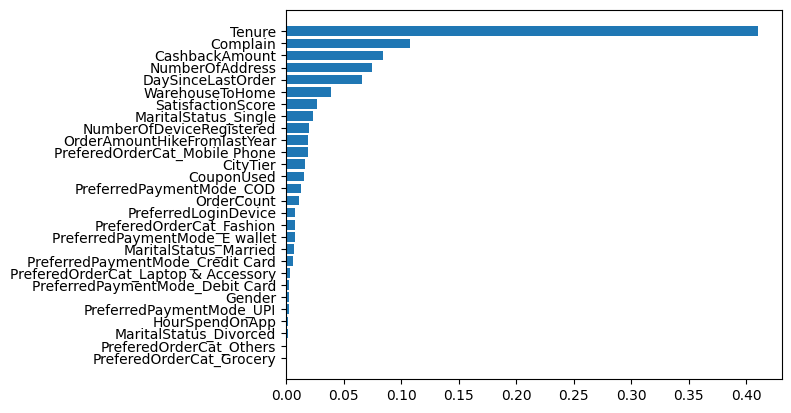

In [ ]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)